In [1]:
import pandas as pd

df = pd.read_csv("results/heatmap_results.csv")

In [2]:
# Set the first column as the index
df.set_index(df.columns[0], inplace=True)
print(df)

                    answer_0  answer_1  answer_2  answer_3  answer_4  \
Question                                                               
Reasoning subject?         0         0         1         0         0   
-0.3                       0         0         0         0         0   
-0.15                      0         0         0         0         0   
0                          0         0         0         1         1   
0.15                       0         0         0         1         1   
0.3                        0         0         0         1         1   

                    answer_5  answer_6  answer_7  answer_8  answer_9  ...  \
Question                                                              ...   
Reasoning subject?         0         0         0         1         1  ...   
-0.3                       0         0         1         0         0  ...   
-0.15                      0         1         1         0         1  ...   
0                          0         1

In [3]:
# Split columns into two groups based on "Reasoning subject?" row
reasoning_1_cols = df.columns[df.loc["Reasoning subject?"] == 1]
reasoning_0_cols = df.columns[df.loc["Reasoning subject?"] == 0]

# Function to count the number of zeros for numerical rows
def count_zeros(column):
    return (df.loc[df.index.str.contains(r'^-?\d+(\.\d+)?$', regex=True), column] == 0).sum()

# Sort columns within each group based on the total number of zeros
reasoning_1_cols_sorted = sorted(reasoning_1_cols, key=count_zeros, reverse=True)
reasoning_0_cols_sorted = sorted(reasoning_0_cols, key=count_zeros, reverse=True)

# Combine the sorted columns
sorted_columns = reasoning_1_cols_sorted + reasoning_0_cols_sorted

# Reorder the DataFrame's columns
df_sorted = df[sorted_columns]


display(df_sorted)

/var/folders/y6/mz3jcp2n60zc3rfc9mdd55k00000gn/T/ipykernel_51730/2655132628.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  return (df.loc[df.index.str.contains(r'^-?\d+(\.\d+)?$', regex=True), column] == 0).sum()


,answer_2,answer_8,answer_14,answer_23,answer_24,answer_25,answer_34,answer_37,answer_43,answer_44,...,answer_15,answer_20,answer_42,answer_51,answer_56,answer_6,answer_19,answer_28,answer_7,answer_50
Question,,,,,,,,,,,,,,,,,,,,,
Reasoning subject?,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
-0.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
-0.15,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,1,1,1,1
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
0.15,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
0.3,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,1,1,1,1


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.colors import ListedColormap



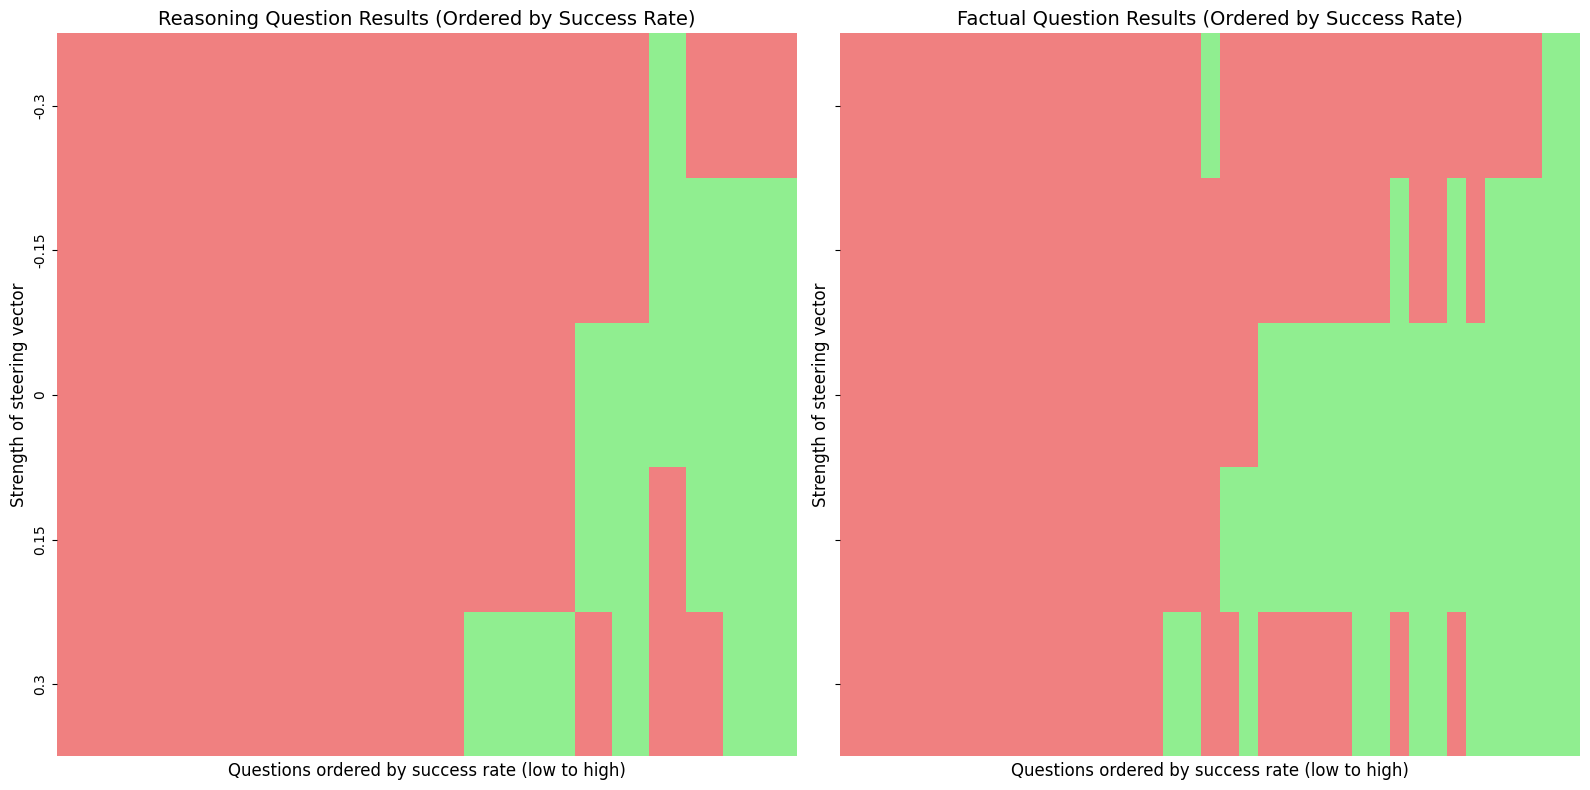

In [6]:
heatmap_data = df_sorted.drop("Reasoning subject?")

# Split the columns based on "Reasoning subject?" values
reasoning_cols = df_sorted.columns[df_sorted.loc["Reasoning subject?"] == 1]
non_reasoning_cols = df_sorted.columns[df_sorted.loc["Reasoning subject?"] == 0]

# Extract the corresponding data
reasoning_data = heatmap_data[reasoning_cols]
non_reasoning_data = heatmap_data[non_reasoning_cols]

# Define the original red/green colormap
cmap = ListedColormap(["lightcoral", "lightgreen"])

# Plot the heatmaps
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# Reasoning heatmap
sns.heatmap(
    reasoning_data,
    cmap=cmap,
    cbar=False,
    linewidths=0,  # No gridlines
    xticklabels=False,
    yticklabels=True,  # Keep the row labels
    ax=axes[0]
)
axes[0].set_title("Reasoning Question Results (Ordered by Success Rate)", fontsize=14)
axes[0].set_xlabel("Questions ordered by success rate (low to high)", fontsize=12)
axes[0].set_ylabel("Strength of steering vector", fontsize=12)

# Non-reasoning heatmap
sns.heatmap(
    non_reasoning_data,
    cmap=cmap,
    cbar=False,
    linewidths=0,  # No gridlines
    xticklabels=False,
    yticklabels=True,  # Remove row labels for this heatmap
    ax=axes[1]
)
axes[1].set_title("Factual Question Results (Ordered by Success Rate)", fontsize=14)
axes[1].set_xlabel("Questions ordered by success rate (low to high)", fontsize=12)
axes[1].set_ylabel("Strength of steering vector", fontsize=12)

# Adjust layout for aesthetics
plt.tight_layout()
plt.show()

